## **Paired t-test**

The paired t-test is used to check whether the normally distributed populations behind two dependent datasets have the same expected value.


### <ins>Defining the conditions<ins>

First, we import the module and create the datasets. The datasets needs to be in a pandas dataframe, thus pandas needs to be imported as well. The corresponding values must be in the same position in the list of their dataset. Accordingly, first value on dataset_1 is the pair of the first value of dataset_2 and so on:

In [1]:
import colibripy.stats.parametric.t_test as tt
import pandas as pd

dataset_1 = [1.4, -0.3, 2.2, 2.7, 2.7, 0.1, 1.1, 3.2, 1.9, 1.3]
dataset_2 = [2.3, 1.1, 0.9, 1.5, 1.2, 1.6, 0.2, 1.4, 2.2, 1.4]
sample_1 = pd.DataFrame(dataset_1)
sample_2 = pd.DataFrame(dataset_2)


Now we can initiate the evaluation by defining the conditions of the t-test. It is a paired t-test (dependent samples), thus we need the `PairedSamples` module. Here, we perform a **'two-sided'** test at **0.05** significance level:

In [2]:
conditions = tt.PairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.05,
    type="two-sided",
)

The `alpha` only affects the calculated confidence limits, and of course the decision about the nullhypothesis when we compare it to the p-value.

### <ins>Changing the conditions<ins>

We may want to change the conditions, for example to see 90% confidence interval instead of the 95%, or do a one-sided test instead of a two-sided. We can do that without redefining every conditions:

In [3]:
print(conditions.alpha, "and", conditions.type)
conditions.alpha = 0.1
conditions.type = "one-sided"
print(conditions.alpha, "and", conditions.type)

0.05 and two-sided
0.1 and one-sided


### <ins>Performing the test<ins>

#### *Two-sided test*

Let's perform a **'two-sided'** test at **0.05** significance level, and it is tested whether the expected values are equal:

In [4]:
conditions = tt.PairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.05,
    type="two-sided",
)
results = conditions.test()
results

,means_diff,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,0.25,0.393347,0.63557,-0.639814,1.139814,0.540878


The `.test()` gives the results of the evaluation in a form of a pandas dataframe. The 'means_diff' is the mean of the pairwise differences (calculated as sample_1's value minus sample_2's value), 'ste' is the standard error of the mean of the differences, 'test_statistic' is the calculated test statistic, and the lower and upper confidence limits (CL) gives the interval within which the expected value of the mean of the differences can be found with 1-`alpha` probability (95% in this case).

The p-value is greater than the significance level, thus the nullhypothesis cannot be rejected; the expected values of the populations can be equal.

The values in the table can be called using the column names, for example:

In [5]:
results['p-value']


0    0.540878
Name: p-value, dtype: float64

or

In [6]:
results['p-value'].item()

0.5408780247750509

#### *One-sided test*


Let's perform a **'one-sided'** test at **0.1** significance level, and it is tested whether the expected value of sample_1 is **greater** or equal to the expected value of sample_2. The greater or equal part is defined in the `.test()`:

In [7]:
conditions = tt.PairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.1,
    type="one-sided",
)
results = conditions.test(">")
results

,means_diff,ste,test_statistic,90.0% upper CL,p-value
0,0.25,0.393347,0.63557,0.794011,0.729561


The `.test()` gives the results of the evaluation in a form of a pandas dataframe. The 'means_diff' is the mean of the pairwise differences (calculated as sample_1's value minus sample_2's value), 'ste' is the standard error of the mean of the differences, 'test_statistic' is the calculated test statistic, and the upper confidence limits (CL) gives the value that if added to the mean of `sample_2`, the nullhypothesis is on the verge of acceptance.

The p-value is greater than the significance level, thus the nullhypothesis cannot be rejected; the expected values of the populations can be equal.

The values in the table can be called using the column names, for example:

In [8]:
results['p-value']


0    0.729561
Name: p-value, dtype: float64

or

In [9]:
results['p-value'].item()

0.7295609876124746

Let's test if the expected value of the sample_1 is smaller than or equal than the expected value of sample_2:

In [10]:
conditions = tt.PairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.1,
    type="one-sided",
)
results = conditions.test("<")
results

,means_diff,ste,test_statistic,90.0% lower CL,p-value
0,0.25,0.393347,0.63557,-0.294011,0.270439


We cannot reject the nullhypothesis at 0.1 significance level, that is, the expected value of the sample can be smaller than or equal to the expected value of sample_2. 

### <ins>Plotting the data<ins>

The boxplot of the pairwise differences with a red horizontal line refering to the reference value of zero can be plotted as follows:

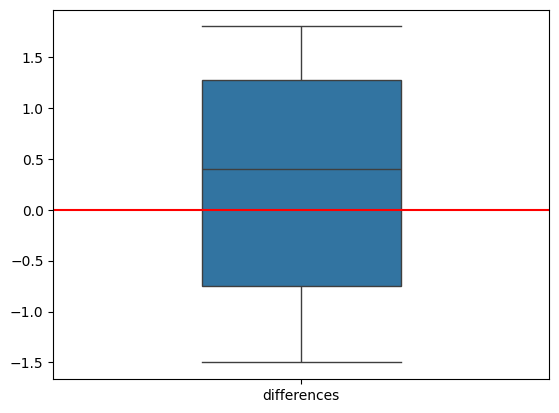

In [11]:
conditions.plot()

### <ins>Residual analysis<ins>

The residuals can only be called, if `.test()` was called already. The residuals, that is the differences between the differences of the pairwise values and the mean of the differences of the pairwise values can be obtained as:

In [12]:
conditions.residuals

,residuals
0,-1.15
1,-1.65
2,1.05
3,0.95
4,1.25
5,-1.75
6,0.65
7,1.55
8,-0.55
9,-0.35


The assumption of the residuals following a normal distribution can be checked by residual plots (QQ plot at the left and histogram of the residuals at right):

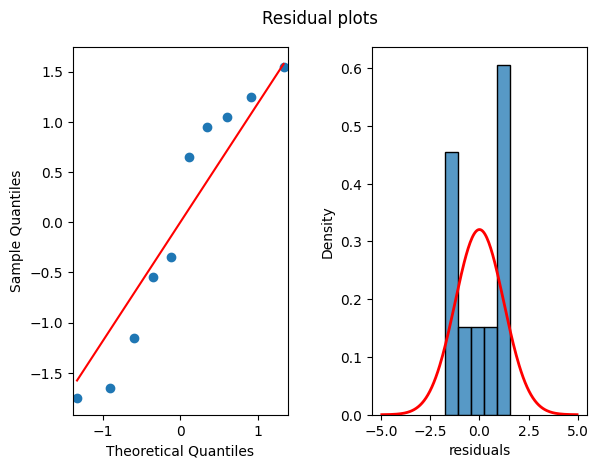

In [13]:
conditions.residual_plot()

Normality test can also be conducted. The following method uses the Shapiro Wilk test:

In [14]:
conditions.normality()

{'p-value': 0.2276567586081802}

or

In [15]:
conditions.normality()["p-value"]

0.2276567586081802

The normality test is automatically performed when `.test()` is called. If the p-value is lower than 0.05, that is we would reject the nullhypothesis of normality at 0.05 significance level, a warning message is generated automatically. For example:

In [16]:
sample_1_nonnormal = pd.DataFrame([1, 1, 10])
sample_2_nonnormal = pd.DataFrame([2, 2, 20])
conditions_nonnormal = tt.PairedSamples(
    sample_1=sample_1_nonnormal,
    sample_2=sample_2_nonnormal,
    alpha=0.05,
    type="two-sided",
)
conditions_nonnormal.test()

╒═══════════════════════════════════════════════════════════════════════════════════════════╕
│                                         Warning:                                          │
╞═══════════════════════════════════════════════════════════════════════════════════════════╡
│ The p-value of the Shapiro-Wilk normality test of the residuals is 7.771561172376096e-16. │
│     Normality of the residuals is not fulfilled, nonparametric test may be preferred.     │
╘═══════════════════════════════════════════════════════════════════════════════════════════╛



,means_diff,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,-4.0,3.0,-1.333333,-16.907958,8.907958,0.314006
